<a href="https://colab.research.google.com/github/avishatr/Tugas-11---Avisha-Tiara-Rizky---1101208139---TTX-44-01/blob/main/Tugas_11_Phyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
ls

 1-forest-street.jpg  'TUGAS 10 PHYTON'        'Tugas 12.ipynb'
 3scene/               Tugas11-Daun/
 nnmodel_scene/       'Tugas 11 Phyton.ipynb'


In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Tugas11-Daun")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 
  # preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.35, shuffle=True)
print(trainX.shape)
print(testX.shape)

(379, 64, 64, 3)
(205, 64, 64, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Convolution2D(16, (5,5), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
# fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [12]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=75, batch_size=32)

[INFO] training network...
Epoch 1/75
12/12 [==============================] - 2s 163ms/step - loss: 1.6058 - accuracy: 0.2876 - val_loss: 1.4985 - val_accuracy: 0.5220
Epoch 2/75
12/12 [==============================] - 2s 150ms/step - loss: 1.3955 - accuracy: 0.4723 - val_loss: 1.2483 - val_accuracy: 0.5122
Epoch 3/75
12/12 [==============================] - 2s 155ms/step - loss: 1.2219 - accuracy: 0.4881 - val_loss: 1.2565 - val_accuracy: 0.4341
Epoch 4/75
12/12 [==============================] - 2s 150ms/step - loss: 1.0125 - accuracy: 0.6095 - val_loss: 1.0196 - val_accuracy: 0.6000
Epoch 5/75
12/12 [==============================] - 2s 152ms/step - loss: 0.8813 - accuracy: 0.6623 - val_loss: 1.0565 - val_accuracy: 0.5902
Epoch 6/75
12/12 [==============================] - 2s 148ms/step - loss: 0.7752 - accuracy: 0.6860 - val_loss: 0.9325 - val_accuracy: 0.6585
Epoch 7/75
12/12 [==============================] - 2s 149ms/step - loss: 0.6836 - accuracy: 0.7388 - val_loss: 1.0046 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


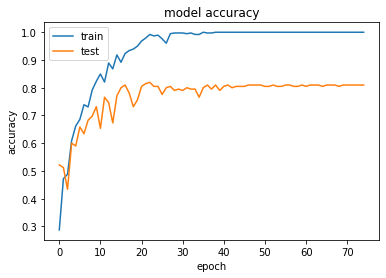

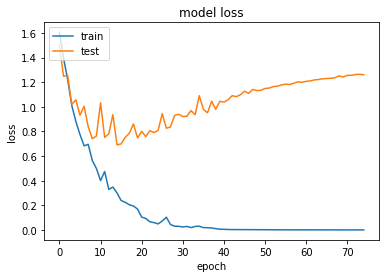

In [13]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.78      0.71      0.74        49
      GMB_02       0.84      0.79      0.81        33
      GMB_03       0.81      0.87      0.84        30
      GMB_04       0.78      0.78      0.78        41
      GMB_05       0.84      0.90      0.87        52

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



In [15]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [19]:
import cv2
import matplotlib.pyplot as plt
image1='Tugas11-Daun/GMB_02-20201213T092111Z-001/GMB_02/IMG_20200814_133326_HDR.jpg'

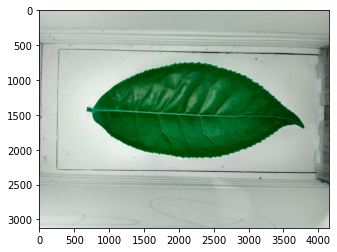

In [20]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [21]:
image_testing = Image.open('Tugas11-Daun/GMB_02-20201213T092111Z-001/GMB_02/IMG_20200814_133326_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [22]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [23]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.0577525e-03 9.9678862e-01 5.4384753e-17 1.5318448e-04 4.5834275e-07]]
['GMB_02']
